In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import matplotlib as mpl
import os
from matplotlib.lines import Line2D
from collections import Counter
import math
from sklearn.decomposition import PCA
from aging.behavior.syllables import relabel_by_usage, compute_usage
%matplotlib inline
import datetime

In [40]:
# plot/colors definitions
cpath = '/n/groups/datta/win/longtogeny/code/notebooks/exploration/Dana'
data_loc=cpath+'/figs/'
try:
    os.mkdir(data_loc)
except FileExistsError:
    # directory already exists
    pass

plt.style.use('dark_background')
cmm = sns.color_palette("light:b", as_cmap=True)
cmf = sns.color_palette("light:orange", as_cmap=True)

In [41]:
## for males

In [42]:
## upload data frame females
path = Path('/n/groups/datta/win/longtogeny/data/ontogeny/version_02/longtogeny_musages_mtx_all.parquet')
mdf_all = pd.read_parquet(path)
path = Path('/n/groups/datta/win/longtogeny/data/ontogeny/version_02/longtogeny_musages_mtx_most_used.parquet')
mdf = pd.read_parquet(path)

In [43]:
## filter out bad days - 
bad_session=[221, 228]
#bad_syllable=[44,89]
bad_syllable=[44]
bad_mouse='04_01'
#new_df = mdf.copy()
#new_df.drop(bad_session, level=0, axis=0, inplace=True)
#new_df.drop(bad_mouse, level=1, axis=0, inplace=True)
#new_df.drop(bad_syllable, axis=1, inplace=True)

## PC on males

In [61]:
pca = PCA(n_components=2)
pcs=pca.fit_transform(np.log(mdf + 1e-6))
ages = mdf.index.get_level_values(0)
pc_df = pd.DataFrame(pcs)
pc_df['age'] = ages
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.43046938 0.15641826]


/tmp/ipykernel_8906/84801750.py:26: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  ax.figure.colorbar(sm)


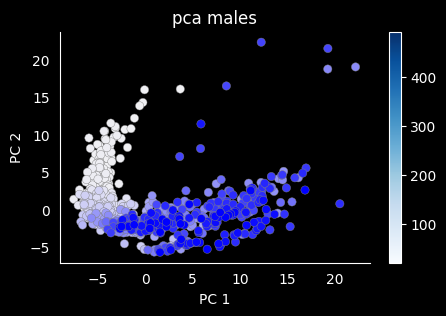

In [62]:
fig, ax = plt.subplots(figsize=(5, 3))
ec=sns.scatterplot(data=pc_df, x=pc_df[0], y=pc_df[1], 
                hue="age",
                palette=cmm,
                #palette='rocket_r',
                #size="age",
                #style='age',
                sizes=(80, 20),
                edgecolor='gray',
                linewidth=0.3, 
                #alpha = 0.7,
                legend='full',
               )
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
#plt.legend(frameon=False)
plt.title("pca males")
sns.despine()
norm = plt.Normalize(pc_df['age'].min(), pc_df['age'].max())
sm = plt.cm.ScalarMappable(cmap="Blues", norm=norm)
sm.set_array([])

# Remove the legend and add a colorbar
ax.get_legend().remove()
ax.figure.colorbar(sm)
plt.savefig(data_loc +'long_pca_male.pdf', bbox_inches='tight')

In [63]:
from scipy import stats
[c,p] = stats.spearmanr(pc_df[0], ages)
c

0.7948457851171778

/tmp/ipykernel_8906/2302523920.py:14: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  ax.figure.colorbar(sm)


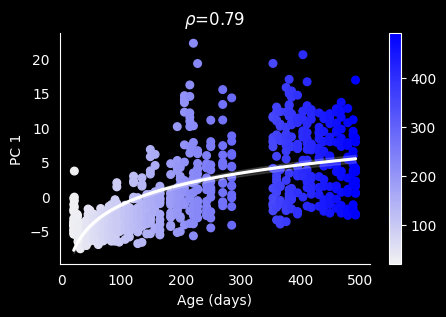

In [65]:
fig, ax = plt.subplots()
fig.set_size_inches(5,3) 
plt.scatter(x=ages, y=pc_df[0], s=30, c=ages, cmap=cmm)
ax = sns.regplot(data=pc_df, x='age', y=pc_df[0], scatter=False, color='w', logx=True)
ax.set(xlabel='Age (days)', ylabel='PC 1')
plt.title(f'$\\rho$={c:0.2f}')
norm = plt.Normalize(pc_df['age'].min(), pc_df['age'].max())
sns.despine()
sm = plt.cm.ScalarMappable(cmap=cmm, norm=norm)
sm.set_array([])

# Remove the legend and add a colorbar
#ax.get_legend().remove()
ax.figure.colorbar(sm)

plt.savefig(data_loc +'long_pc1_male_corr_age.pdf', bbox_inches='tight')

In [48]:
## 3d pca

In [49]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

pcs = PCA(n_components=3).fit_transform(np.log(mdf + 1e-6))
ages = mdf.index.get_level_values(0)
pc_df = pd.DataFrame(pcs)
pc_df['age'] = ages

# syllbles by age males
data= mdf.copy()
data_labels = data.index.get_level_values(0).to_numpy()
data= data.to_numpy()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


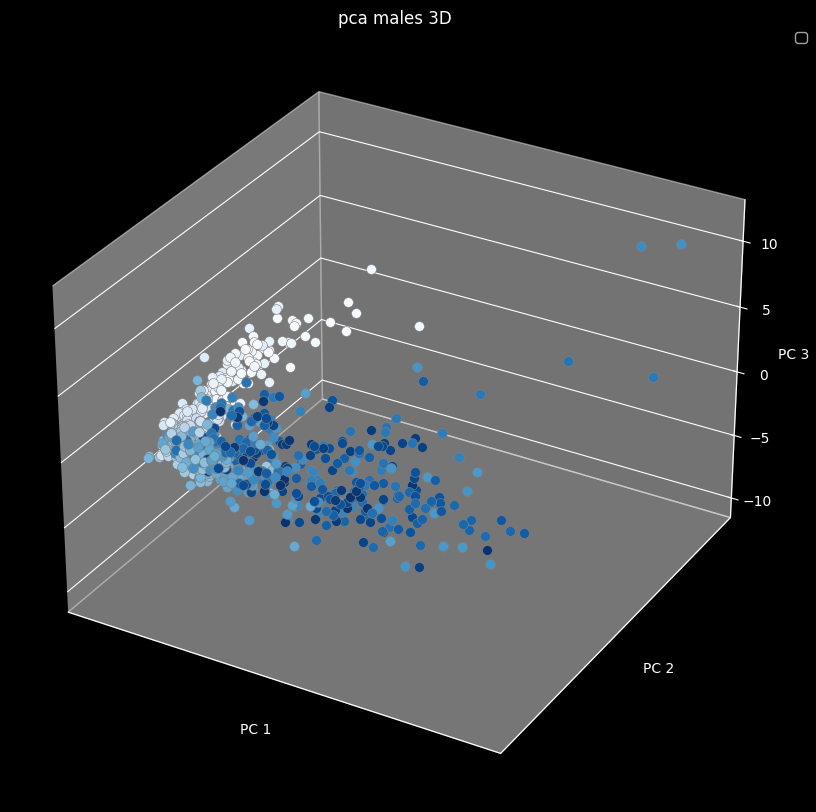

In [50]:
fig = plt.figure()
fig.set_size_inches(10,10) 
ax = fig.add_subplot(projection='3d')
cmap = ListedColormap(sns.color_palette("Blues", 256).as_hex())


# plot Males
cmap2 = mpl.cm.Blues
ages = np.unique(data_labels)
colors = np.arange(0, 256, math.ceil(256/len(ages)))
seqmatcolor='magma'

# create age labels colors
counter = Counter(data_labels)
sorted(counter.items())
a=np.array([*counter.values()])

color_mat=[]
n=0
for i,c in enumerate(colors):
    for j in range(a[i]):
        #n=n+1
        #print(n)
        color_mat.append(cmap2(c))

for i in range(len(pc_df)):
    _df = pc_df.loc[i]
    ax.scatter(_df[0], _df[1], _df[2], s=50, marker='o', 
               edgecolor='gray',
               linewidth=0.4, 
               color=color_mat[i], alpha=1)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_zlabel("PC 3")
ax.set_xticks([])
ax.set_yticks([])
#plt.legend(frameon=False)
plt.title("pca males 3D")
sns.despine()

In [51]:
## pca on individuals

In [52]:
df_indv=mdf.groupby(['mouse','age']).mean()

In [53]:
pca = PCA(n_components=2)
pcs=pca.fit_transform(np.log(df_indv + 1e-6))
mouse = df_indv.index.get_level_values(0)
pc_df = pd.DataFrame(pcs)
pc_df['mouse'] = mouse
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.42841777 0.16139121]


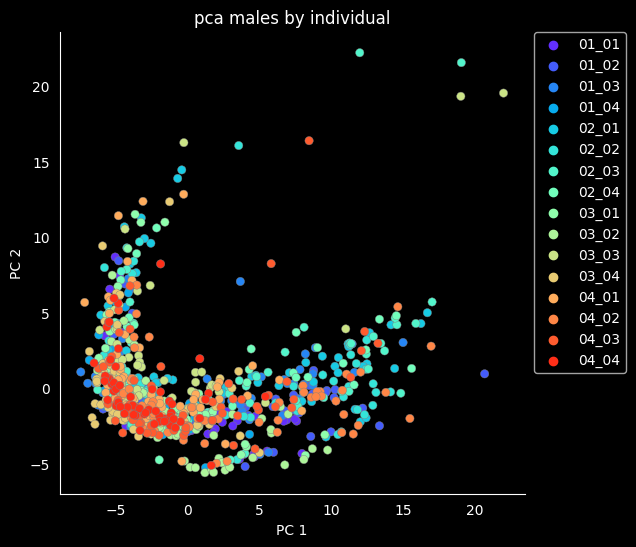

In [54]:
fig, ax = plt.subplots(figsize=(6, 6))
ec=sns.scatterplot(data=pc_df, x=pc_df[0], y=pc_df[1], 
                hue="mouse",
                palette="rainbow",
                #palette='rocket_r',
                #size="age",
                #style='age',
                sizes=(80, 20),
                edgecolor='gray',
                linewidth=0.3, 
                #alpha = 0.7,
                legend='full',
               )
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
#plt.legend(frameon=False)
plt.title("pca males by individual")
sns.despine()

In [55]:
## umap

In [56]:
#temp=mdf.copy()
#temp.drop('04_01', level=1, axis=0, inplace=True) ##remove annoying mouse!!
mdf.drop('04_01', level=1, axis=0, inplace=True) ##remove annoying mouse!!

In [57]:
# syllbles by age males
data_umap= mdf.copy().to_numpy()
data_umap_labels = mdf.index.get_level_values(0).to_numpy()

In [58]:
# transform age mice to labels
from sklearn.preprocessing import StandardScaler, LabelEncoder
exp = np.unique(data_umap_labels)
le = LabelEncoder()
le.fit(exp)
y = le.transform(data_umap_labels)

In [59]:
# sort frequencies by mouse
coordinates = umap_embedding(data_umap.T, 
        standardize=True,
        n_pcs=None, 
        n_components=2, 
        n_neighbors=20,
        random_state=0)

NameError: name 'umap_embedding' is not defined

In [ ]:
# variables to plot
import colorcet as cc
cmap2 = cc.blues
#cmap2 = 'Blues'

cmap2 = mpl.cm.Blues
ages = np.unique(data_labels)
colors = np.arange(0, 256, math.ceil(256/len(ages)))

# create age labels colors
counter = Counter(data_labels)
sorted(counter.items())
a=np.array([*counter.values()])

color_mat=[]
n=0
for i,c in enumerate(colors):
    for j in range(a[i]):
        #n=n+1
        #print(n)
        color_mat.append(cmap2(c))
        
lines=[]
# legend
for i,c in enumerate(colors):
        lines.append(Line2D([0], [0], color=cmap2(c), lw=2))

fig, ax = plt.subplots()
fig.set_size_inches(5,5) 
plt.legend(handles=lines,labels=list(exp),bbox_to_anchor=(1.2, 1))
plt.title('Umap colored by days',fontsize=10)
ax.set_xticks([])
ax.set_yticks([])
fig.patch.set_facecolor('white')
    
for i in range(len(coordinates)):
    plt.scatter(coordinates[i][0],coordinates[i][1],color=lines[y[i]].get_color(),
                edgecolor='gray',
                linewidth=0.4,
                s=40)
#fig.savefig(data_loc + 'umap_indv.pdf', bbox_inches='tight')

In [ ]:
## colored by individuals
data_umap_labels = mdf.index.get_level_values(1).to_numpy()
exp = np.unique(data_umap_labels)
le = LabelEncoder()
le.fit(exp)
y = le.transform(data_umap_labels)

In [ ]:
# variables to plot
import colorcet as cc
cmap2 = cc.glasbey
#cmap2 = 'Blues'

cmap2 = mpl.cm.rainbow
ages = np.unique(data_umap_labels)
colors = np.arange(0, 256, math.ceil(256/len(ages)))

# create age labels colors
counter = Counter(data_labels)
sorted(counter.items())
a=np.array([*counter.values()])

color_mat=[]
n=0
for i,c in enumerate(colors):
    for j in range(a[i]):
        #n=n+1
        #print(n)
        color_mat.append(cmap2(c))
        
lines=[]
# legend
for i,c in enumerate(colors):
        lines.append(Line2D([0], [0], color=cmap2(c), lw=2))

fig, ax = plt.subplots()
fig.set_size_inches(5,5) 
plt.legend(handles=lines,labels=list(exp),bbox_to_anchor=(1.2, 1))
plt.title('Umap colored by indv',fontsize=10)
ax.set_xticks([])
ax.set_yticks([])
fig.patch.set_facecolor('white')
    
for i in range(len(coordinates)):
    plt.scatter(coordinates[i][0],coordinates[i][1],color=lines[y[i]].get_color(),
                edgecolor='gray',
                linewidth=0.4,
                s=40)
#fig.savefig(data_loc + 'umap_indv.pdf', bbox_inches='tight')